
--- Random Forest ---
Accuracy: 0.6362
F1 Score: 0.6253
Classification Report:
               precision    recall  f1-score   support

    Negative       0.64      0.73      0.68       571
     Neutral       0.51      0.34      0.40       361
    Positive       0.68      0.72      0.70       654

    accuracy                           0.64      1586
   macro avg       0.61      0.60      0.59      1586
weighted avg       0.63      0.64      0.63      1586



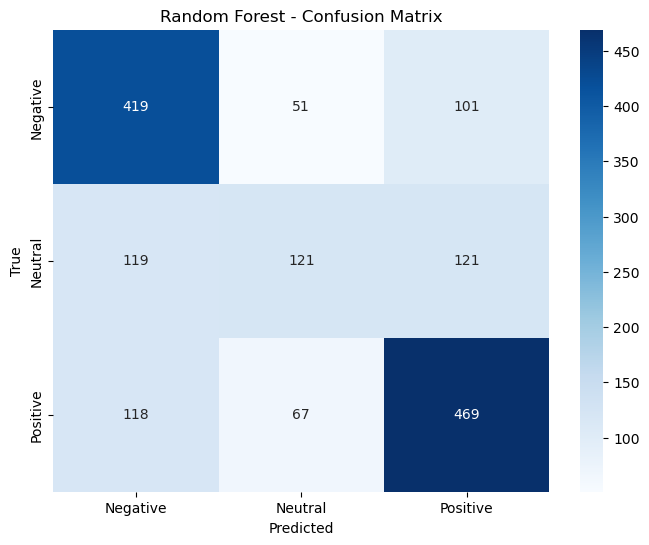


--- Logistic Regression ---
Accuracy: 0.5807
F1 Score: 0.5704
Classification Report:
               precision    recall  f1-score   support

    Negative       0.58      0.67      0.62       571
     Neutral       0.42      0.29      0.34       361
    Positive       0.64      0.67      0.65       654

    accuracy                           0.58      1586
   macro avg       0.55      0.54      0.54      1586
weighted avg       0.57      0.58      0.57      1586



c:\Users\USERAS\anaconda3\envs\resPy\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


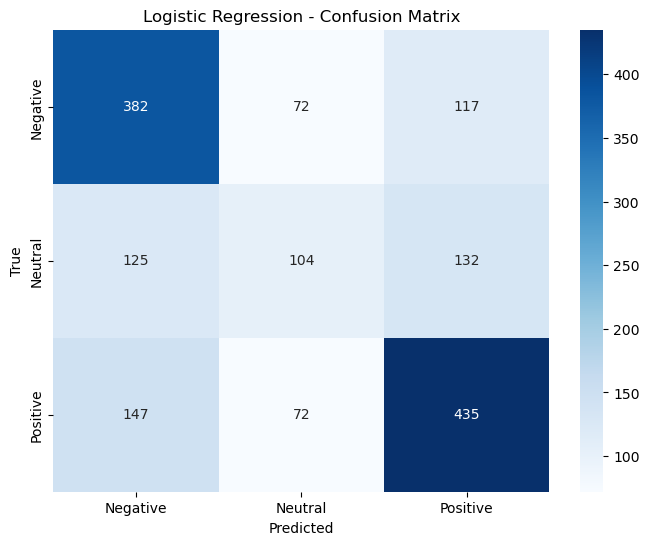


--- Support Vector Machine ---
Accuracy: 0.6040
F1 Score: 0.5844
Classification Report:
               precision    recall  f1-score   support

    Negative       0.60      0.71      0.65       571
     Neutral       0.45      0.23      0.31       361
    Positive       0.65      0.72      0.68       654

    accuracy                           0.60      1586
   macro avg       0.57      0.55      0.55      1586
weighted avg       0.59      0.60      0.58      1586



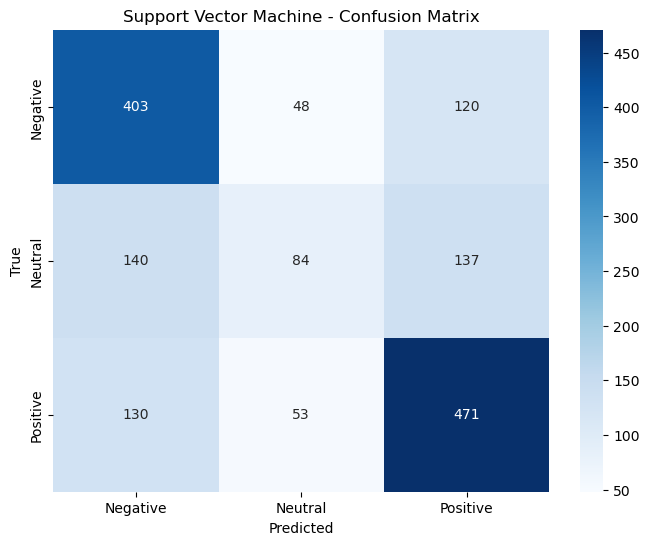


--- K-Nearest Neighbors ---
Accuracy: 0.4552
F1 Score: 0.4553
Classification Report:
               precision    recall  f1-score   support

    Negative       0.48      0.61      0.53       571
     Neutral       0.28      0.32      0.30       361
    Positive       0.59      0.39      0.47       654

    accuracy                           0.46      1586
   macro avg       0.45      0.44      0.44      1586
weighted avg       0.48      0.46      0.46      1586



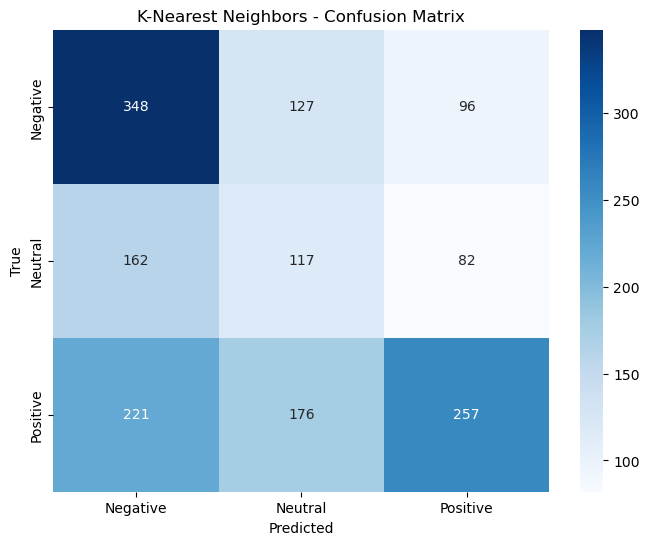


--- Naive Bayes ---
Accuracy: 0.5889
F1 Score: 0.5608
Classification Report:
               precision    recall  f1-score   support

    Negative       0.59      0.70      0.64       571
     Neutral       0.46      0.17      0.25       361
    Positive       0.61      0.72      0.66       654

    accuracy                           0.59      1586
   macro avg       0.55      0.53      0.52      1586
weighted avg       0.57      0.59      0.56      1586



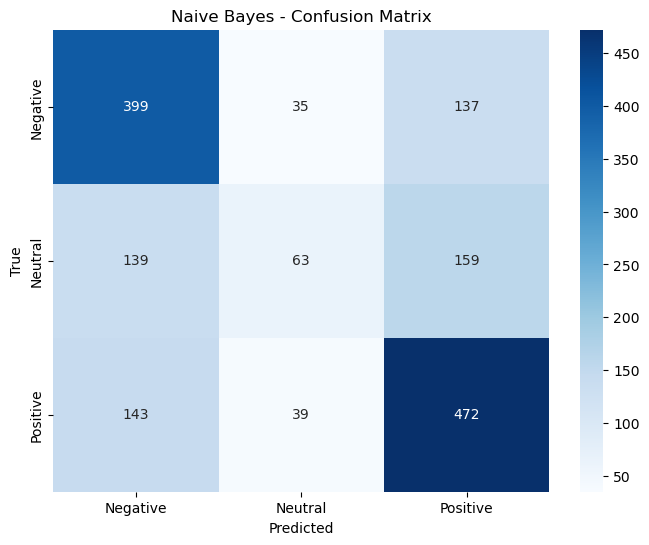


--- Decision Tree ---
Accuracy: 0.5794
F1 Score: 0.5777
Classification Report:
               precision    recall  f1-score   support

    Negative       0.60      0.64      0.62       571
     Neutral       0.41      0.38      0.40       361
    Positive       0.64      0.63      0.64       654

    accuracy                           0.58      1586
   macro avg       0.55      0.55      0.55      1586
weighted avg       0.58      0.58      0.58      1586



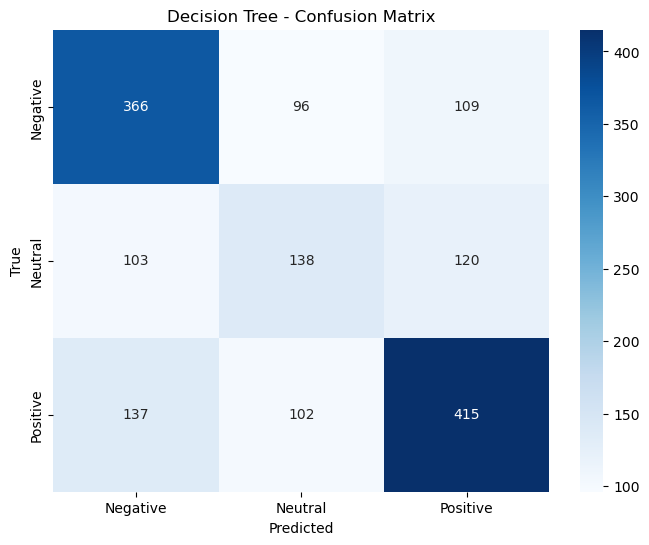


--- XGBoost ---


c:\Users\USERAS\anaconda3\envs\resPy\Lib\site-packages\xgboost\core.py:158: UserWarning: [01:02:13] WARNING: C:\b\abs_90_bwj_86a\croot\xgboost-split_1724073762025\work\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Accuracy: 0.5813
F1 Score: 0.5622
Classification Report:
               precision    recall  f1-score   support

    Negative       0.57      0.70      0.63       571
     Neutral       0.43      0.22      0.29       361
    Positive       0.64      0.68      0.66       654

    accuracy                           0.58      1586
   macro avg       0.54      0.53      0.52      1586
weighted avg       0.56      0.58      0.56      1586



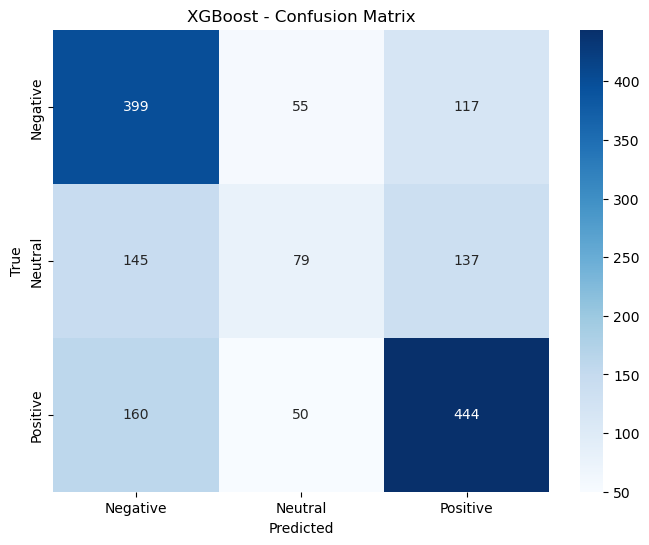


--- Gradient Boosting ---
Accuracy: 0.5309
F1 Score: 0.4745
Classification Report:
               precision    recall  f1-score   support

    Negative       0.48      0.75      0.58       571
     Neutral       0.50      0.03      0.06       361
    Positive       0.60      0.61      0.61       654

    accuracy                           0.53      1586
   macro avg       0.53      0.47      0.42      1586
weighted avg       0.53      0.53      0.47      1586



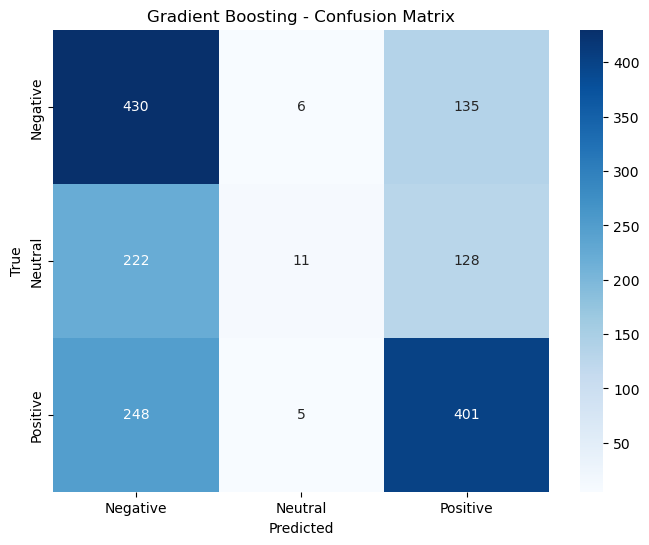

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score, confusion_matrix

# Load datasets
train_df = pd.read_csv("data/Train.csv")
test_df = pd.read_csv("data/Test.csv")
val_df = pd.read_csv("data/Val.csv")

# Rename labels
label_mapping = {0: "Neutral", 1: "Positive", 2: "Negative"}
train_df["Label"] = train_df["Label"].map(label_mapping)
test_df["Label"] = test_df["Label"].map(label_mapping)
val_df["Label"] = val_df["Label"].map(label_mapping)

# Check for missing values and shuffle
def preprocess_df(df):
    df.dropna(inplace=True)
    return df.sample(frac=1, random_state=42).reset_index(drop=True)

train_df = preprocess_df(train_df)
test_df = preprocess_df(test_df)
val_df = preprocess_df(val_df)

# Merge train and val for final training
train_valid_df = pd.concat([train_df, val_df], axis=0).reset_index(drop=True)

# Features and Labels
X_train = train_valid_df["Data"]
y_train = train_valid_df["Label"]
X_test = test_df["Data"]
y_test = test_df["Label"]

# Encode labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
label_list = label_encoder.classes_

# Vectorization
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Initialize models
models = {
    "Random Forest": RandomForestClassifier(),
    "Logistic Regression": LogisticRegression(),
    "Support Vector Machine": SVC(probability=True),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": MultinomialNB(),
    "Decision Tree": DecisionTreeClassifier(),
    "XGBoost": XGBClassifier(use_label_encoder=True, eval_metric='logloss'),
    "Gradient Boosting": GradientBoostingClassifier()
}

# Train and Evaluate
for model_name, model in models.items():
    print(f"\n--- {model_name} ---")
    model.fit(X_train_vec, y_train_encoded)
    y_pred = model.predict(X_test_vec)
    
    acc = accuracy_score(y_test_encoded, y_pred)
    f1 = f1_score(y_test_encoded, y_pred, average='weighted')
    print(f"Accuracy: {acc:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Classification Report:\n", classification_report(y_test_encoded, y_pred, target_names=label_list))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test_encoded, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_list, yticklabels=label_list)
    plt.title(f'{model_name} - Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
